In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = 'results/California_Housing/random_search_results_all_4bits.csv'
df = pd.read_csv(path)

In [4]:
df

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.0000,0.0010,3,256,50,0.0010,0.266625,6.056498,0.345149,0.461592,0.347203,0.288408,0.291408,0.296838,0.298835
1,0.0001,0.0010,3,256,70,0.0010,0.266889,5.323131,0.333658,0.451262,0.344442,0.304309,0.306016,0.289422,0.293439
2,0.0001,0.0010,6,128,50,0.0001,0.267646,4.266414,0.353401,0.463285,0.344008,0.295517,0.295759,0.296939,0.297019
3,0.0001,0.0010,5,2048,70,0.0010,0.272618,6.882819,0.353799,0.454359,0.334896,0.295002,0.296485,0.279243,0.282143
4,0.0001,0.0001,5,256,70,0.0001,0.272845,5.710340,0.346443,0.458922,0.360545,0.335010,0.334952,0.292070,0.291813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0001,0.0001,6,4096,30,0.0001,0.334221,3.125823,0.405175,0.457565,0.380526,0.340577,0.340864,0.296086,0.296253
146,0.0000,0.0010,6,1024,30,0.0010,0.334647,6.680052,0.357482,0.458312,0.380525,0.310005,0.312661,0.282594,0.285268
147,0.0001,0.0010,4,4096,70,0.0001,0.409788,3.561633,0.354259,0.456361,0.391491,0.321782,0.321840,0.302419,0.302434
148,0.0001,0.0010,5,1024,70,0.0001,0.437020,6.833870,0.397182,0.454986,0.367034,0.309228,0.309409,0.302964,0.302940


In [5]:
df.columns

Index(['weight_decay', 'learning_rate', 'hidden_layers', 'hidden_neurons',
       'num_epochs', 'decrease_factor', 'val_loss_mlp',
       'val_loss_hard_post_mlp', 'val_loss_hard_thr_post_mlp',
       'val_loss_hard_pre_mlp', 'val_loss_hard_thr_pre_mlp',
       'val_loss_soft_mlp', 'val_loss_soft_hard_mlp', 'val_loss_soft_comp_mlp',
       'val_loss_soft_hard_comp_mlp'],
      dtype='object')

In [6]:
loss_columns = [col for col in df.columns if 'loss' in col]

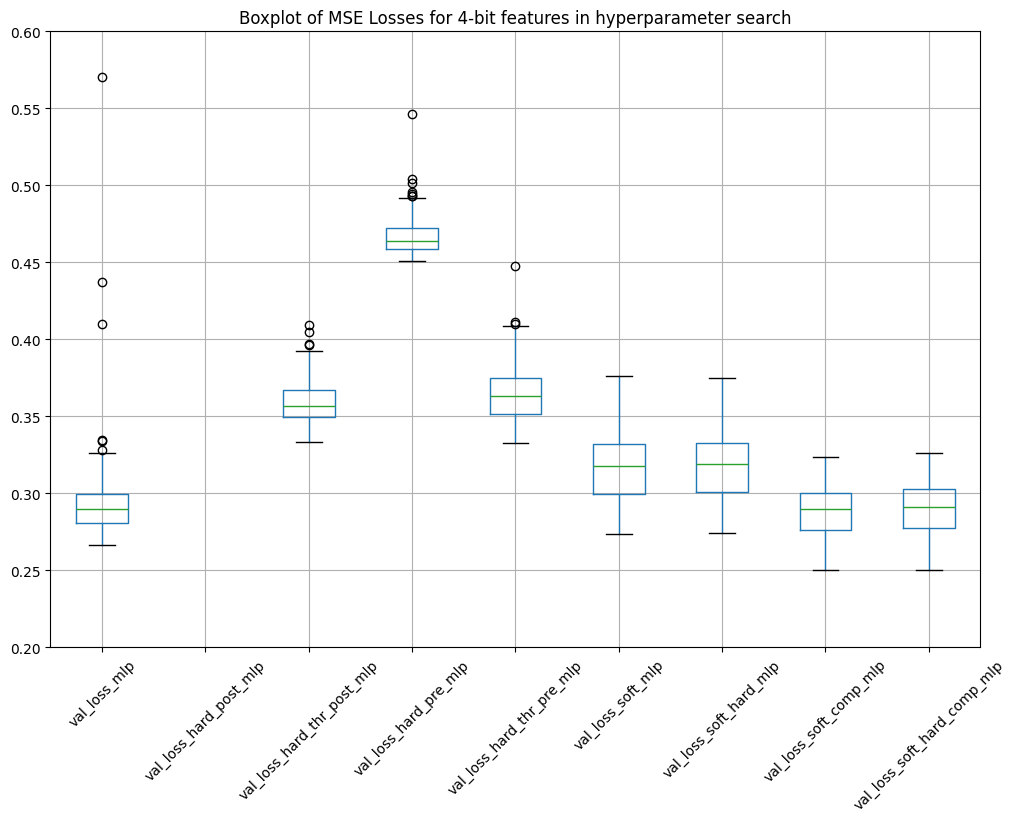

In [7]:
df[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.2,0.6)
plt.title('Boxplot of MSE Losses for 4-bit features in hyperparameter search')
plt.show()

In [8]:
path = 'results/California_Housing/random_search_results_all_best_val_losses.csv'
df_8bit = pd.read_csv(path)

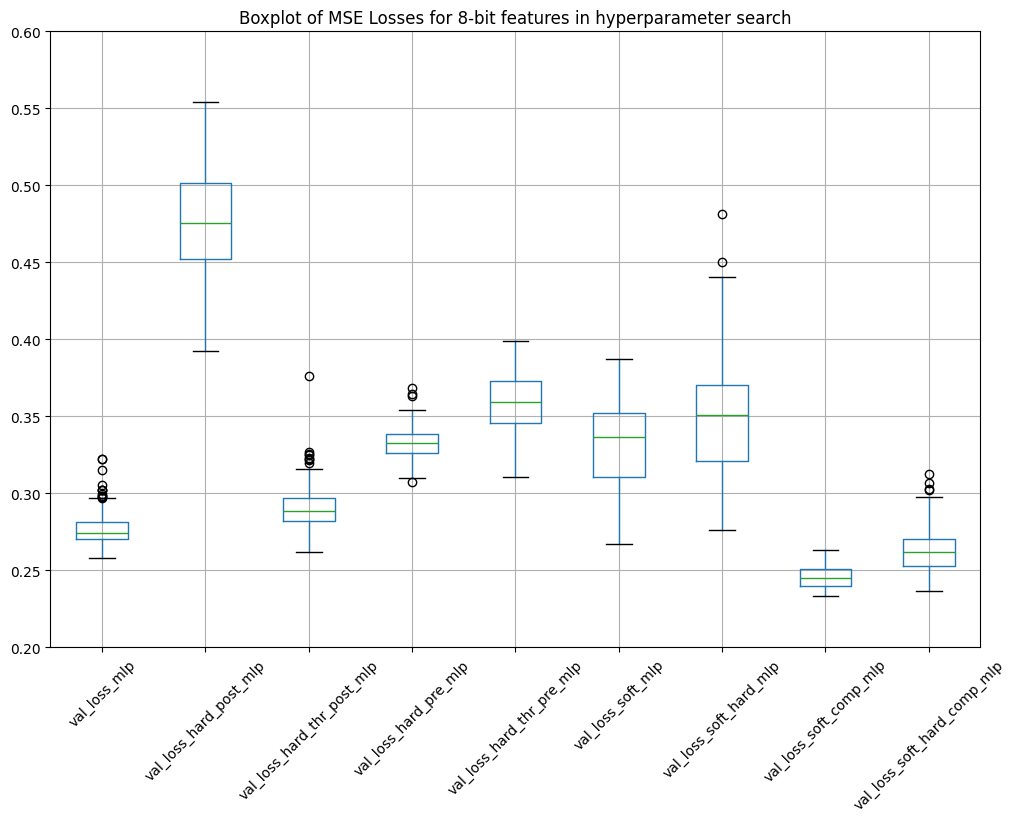

In [9]:
df_8bit[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.2,0.6)
plt.title('Boxplot of MSE Losses for 8-bit features in hyperparameter search')
plt.show()

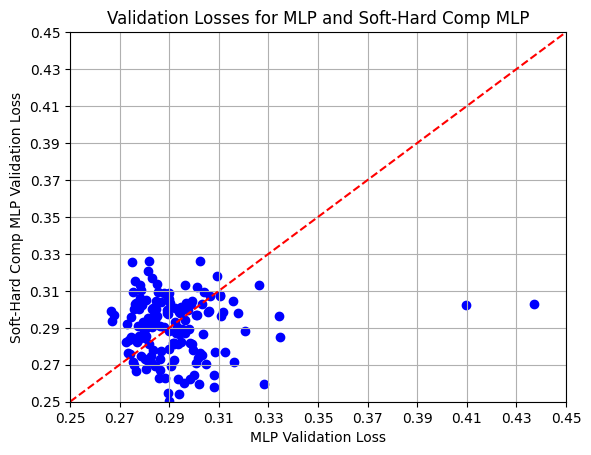

In [10]:
plt.scatter(df['val_loss_mlp'],df['val_loss_soft_hard_comp_mlp'], color = 'blue')
plt.title('Validation Losses for MLP and Soft-Hard Comp MLP')
plt.xlabel('MLP Validation Loss')
plt.ylabel('Soft-Hard Comp MLP Validation Loss')
plt.plot([0.25, 0.45], [0.25, 0.45], 'r--')
plt.xlim(0.25, 0.45)
plt.ylim(0.25, 0.45)
plt.xticks(np.arange(0.25, 0.46, 0.02))
plt.yticks(np.arange(0.25, 0.46, 0.02))
plt.grid()
plt.show()

In [11]:
df.sort_values(by='val_loss_soft_hard_comp_mlp', ascending=True, inplace=True)
df.head()

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
80,0.0001,0.0001,3,512,30,0.0001,0.290065,3.366501,0.348661,0.471974,0.367236,0.361208,0.361303,0.250098,0.250121
95,0.0001,0.0001,3,256,70,0.0001,0.294113,4.240359,0.345758,0.461955,0.370191,0.311872,0.311925,0.254093,0.254110
74,0.0001,0.0001,6,256,30,0.0001,0.289634,3.627678,0.342577,0.472129,0.342614,0.334098,0.334158,0.254531,0.254766
130,0.0001,0.0001,5,128,30,0.0001,0.307900,2.297192,0.356555,0.464028,0.355181,0.328886,0.328835,0.257709,0.258060
119,0.0001,0.0001,4,256,30,0.0001,0.301930,3.747940,0.364537,0.459068,0.359097,0.330327,0.330452,0.259404,0.259589
